Importing Libraries and Dependencies

In [1]:
import string

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import nltk
from nltk.corpus import stopwords

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

Data Collection and Preprocessing

In [2]:

sms_df = pd.read_csv('spam.csv', encoding = "ISO-8859-1", usecols=[0,1], skiprows=1, names=["label", "message"])

In [3]:
# Inspecting the data types
sms_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [4]:
# Checking for missing values
sms_df.isnull().sum()

label      0
message    0
dtype: int64

In [5]:
sms_df['label'] = sms_df['label'].map({'ham': 'Ham', 'spam': 'Spam'})
sms_df['label'].value_counts()

label
Ham     4825
Spam     747
Name: count, dtype: int64

In [6]:
# Insights on the statistics of the data set
sms_df.describe()

,label,message
count,5572,5572
unique,2,5169
top,Ham,"Sorry, I'll call later"
freq,4825,30


Data Visulaization

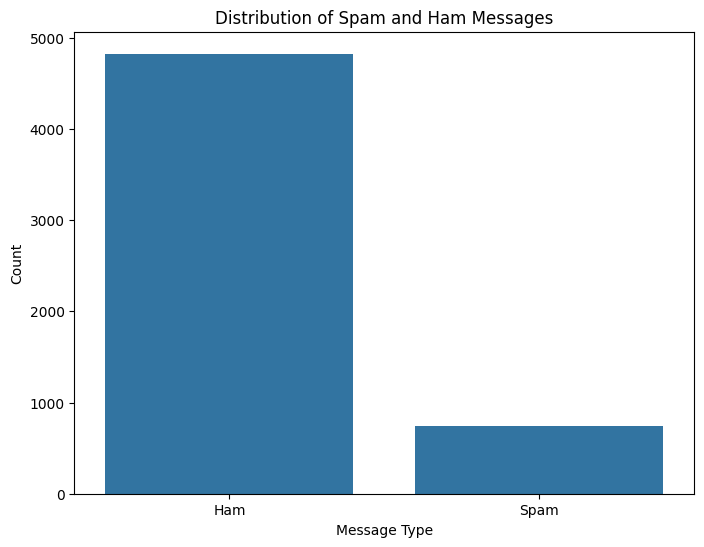

In [7]:
# Create a bar-graph to show the counts of Ham - Spam Messages
plt.figure(figsize=(8, 6))
sns.countplot(x = 'label', data = sms_df)
plt.xlabel('Message Type')
plt.ylabel('Count')
plt.title('Distribution of Spam and Ham Messages')
plt.show()

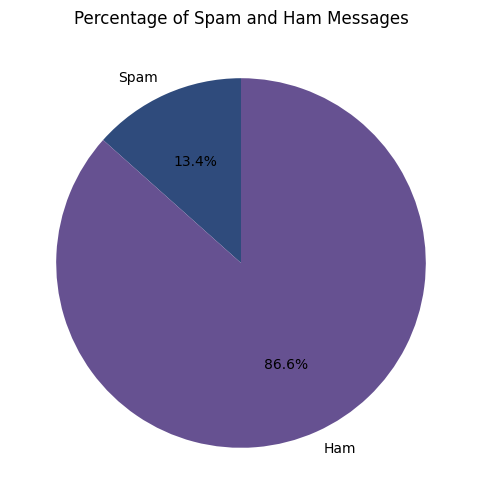

In [8]:
# Count the number of spam and ham messages
spam_count = sms_df['label'].value_counts()['Spam']
ham_count = sms_df['label'].value_counts()['Ham']

# Create a pie chart to show the percentage of spam and ham messages
plt.figure(figsize=(6, 6))
labels = ['Spam', 'Ham']
sizes = [spam_count, ham_count]
colors = ['#2f4b7c', '#665191']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Percentage of Spam and Ham Messages')
plt.show()

Data Preprocessing using NLP (nltk module)

In [9]:
# Create a new copy
sms_df_new = sms_df.copy()

# Remove duplicates
sms_df_new.drop_duplicates(inplace=True)
sms_df_new['label'].value_counts()

label
Ham     4516
Spam     653
Name: count, dtype: int64

In [10]:
def normalizeMessage(text):
    # Convert to lower case
    text = text.lower()
    # Remove special characters and punctuation
    text = ''.join([char for char in text if char not in string.punctuation])
    # Tokenize words
    words = text.split()
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    # Join the processed words back into a string
    processed_text = ' '.join(words)

    return processed_text

In [11]:
sms_df_new['message'] = sms_df_new['message'].apply(normalizeMessage)
sms_df_new['label'] = sms_df_new['label'].map({'Ham': 0, 'Spam': 1})

sms_df_new.head()

,label,message
0,0,go jurong point crazy available bugis n great ...
1,0,ok lar joking wif u oni
2,1,free entry 2 wkly comp win fa cup final tkts 2...
3,0,u dun say early hor u c already say
4,0,nah dont think goes usf lives around though


In [12]:
# Split the data into features (X) and labels (y)
X = sms_df_new['message']  
y = sms_df_new['label']

# Split the Processed data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# TF-IDF Vectorization
vectorizer = CountVectorizer()
tfidf_transformer = TfidfTransformer()
# Training Data
X_train_cv = vectorizer.fit_transform(X_train)
X_train_tfidf = tfidf_transformer.fit_transform(X_train_cv)
# Testing Data
X_test_cv = vectorizer.transform(X_test)
X_test_tfidf = tfidf_transformer.transform(X_test_cv)

Model Selection and Training

In [14]:
# Statistics and Reports for further analysis and fine tuning
def modelPerformanceEvaluation(model, y_test, y_pred):
    print(f'{model}\n')
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)
    print('Accuracy: ', accuracy)
    print('\nConfusion Matrix:\n')
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, cmap='viridis')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()
    print('\nClassification Report:\n')
    print(class_report)

Logistic Regression

Accuracy:  0.9535783365570599

Confusion Matrix:



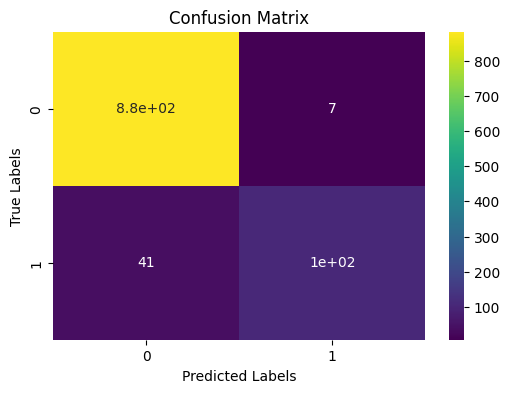


Classification Report:

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       889
           1       0.94      0.72      0.81       145

    accuracy                           0.95      1034
   macro avg       0.95      0.85      0.89      1034
weighted avg       0.95      0.95      0.95      1034



In [15]:
# Model - Logistic Regression
Logistic_Regression = LogisticRegression()
Logistic_Regression.fit(X_train_tfidf, y_train)
y_pred_lr = Logistic_Regression.predict(X_test_tfidf)

modelPerformanceEvaluation('Logistic Regression', y_test, y_pred_lr)

Multinomial Naive Bayes

Accuracy:  0.960348162475822

Confusion Matrix:



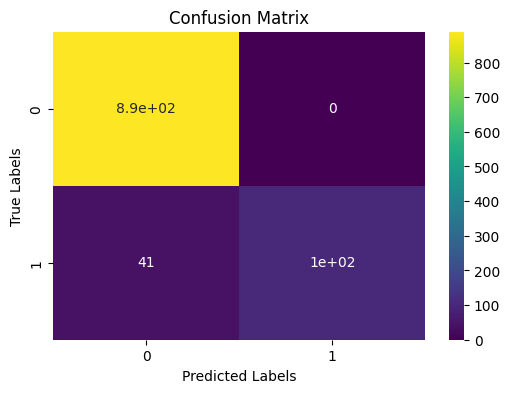


Classification Report:

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       889
           1       1.00      0.72      0.84       145

    accuracy                           0.96      1034
   macro avg       0.98      0.86      0.91      1034
weighted avg       0.96      0.96      0.96      1034



In [16]:
# Model - Multinomial Naive Bayes
Multinomial_NB = MultinomialNB()
Multinomial_NB.fit(X_train_tfidf, y_train)
y_pred_mnb = Multinomial_NB.predict(X_test_tfidf)

modelPerformanceEvaluation('Multinomial Naive Bayes', y_test, y_pred_mnb)

Support Vector Machine

Accuracy:  0.9796905222437138

Confusion Matrix:



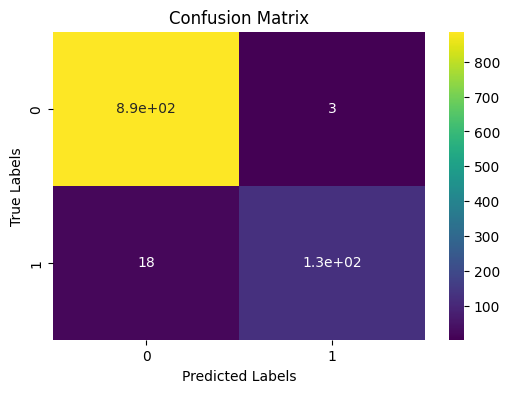


Classification Report:

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       889
           1       0.98      0.88      0.92       145

    accuracy                           0.98      1034
   macro avg       0.98      0.94      0.96      1034
weighted avg       0.98      0.98      0.98      1034



In [17]:
# Model - Support Vector Machines
Support_Vector_Machine = SVC(kernel='linear', probability=True)
Support_Vector_Machine .fit(X_train_tfidf, y_train)
y_pred_svm = Support_Vector_Machine .predict(X_test_tfidf)

modelPerformanceEvaluation('Support Vector Machine', y_test, y_pred_svm)

From the above results produced we can conlude the efficiencies of the models are as follows,

SVM (97.96%) > Multinomial NB (96.03%) > Logistic Regression (95.35%)

Support Vector Machines with TF-IDF produces the most efficient model among the three models for prediction of SMS spam detection ie., Spam or Ham